## Bibliotecas/módulos

In [24]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm

import numpy as np
import pandas as pd
import csv

from sklearn.model_selection import train_test_split

from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

from sklearn import linear_model

## Funções utilizadas

In [25]:
#Função de leitura dos dados------------------------------------
def read_data(path):
    with open(path, newline='') as f:
        reader = csv.reader(f,delimiter=',')
        for row in reader:
            try:
                data = np.vstack( (data , np.asarray(row).astype(np.float) ) )
            except:
                data = np.asarray(row).astype(np.float)
    f.close()
    return data

## "Haberman's Survival Data Set" (https://archive.ics.uci.edu/ml/datasets/Haberman%27s%2BSurvival)

#### Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models, Proceedings of the 9th International Biometrics Conference, Boston, pp. 104-122.

#### Atributos:
* Idade do paciente
* Ano da operação
* Número de nódulos (axiliares) detectados
* Condição:
 * 1: sobreviveu 5 anos ou mais
 * 2: faleceu em 5 anos

In [30]:
path = 'haberman.dat'
nomes = ['Idade','Ano','Nódulos','Condição']

data = read_data(path)

atributos = [0,1,2]
x = data[:,atributos]
y = data[:,3].reshape(-1,1) -1 

#Divisão Ajuste/Avaliação (Treio/Teste)
percentualTeste = 0.33
xD, xI, yD, yI = train_test_split(x,y,test_size=percentualTeste)

Text(0, 0.5, 'Condição')

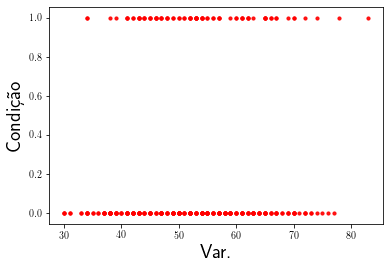

In [31]:
plt.scatter(x[:,0],y,s=10,c='r',alpha=0.90)
plt.xlabel('Var.',fontsize=20)
plt.ylabel('Condição',fontsize=20)

In [32]:
percentualTeste = 0.33
xD, xI, yD, yI = train_test_split(x,y,test_size=percentualTeste)

## Regressão Logit (uma variável)

In [33]:
#Instanciação do modelo
regLogit = linear_model.LogisticRegression()

#Ajuste do modelo
regLogit.fit(xD, yD)


yEst = regLogit.predict(xI)
yEstProb = regLogit.predict_proba(xI)

acerto = np.count_nonzero(yI[:,0] == yEst[:])/y.shape[0]
print(acerto)

0.24836601307189543


/home/rogerio/.anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rogerio/.anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
